In [1]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("ggplot2")

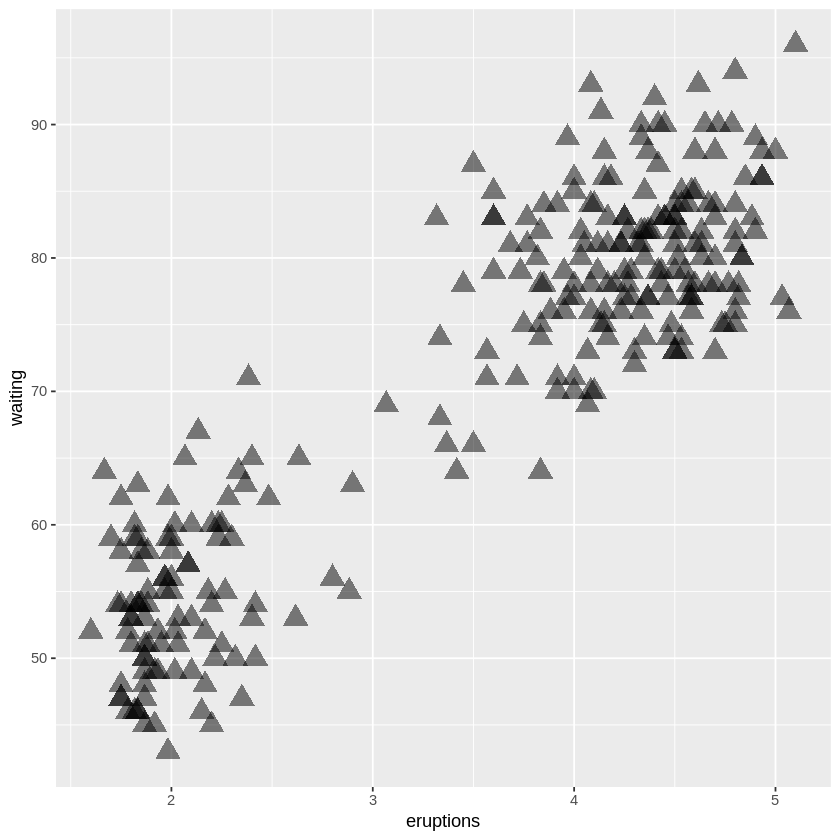

In [7]:
ggplot(faithful) +
  geom_point(aes(x = eruptions, y = waiting), shape = 17, size = 5, alpha = 0.5)

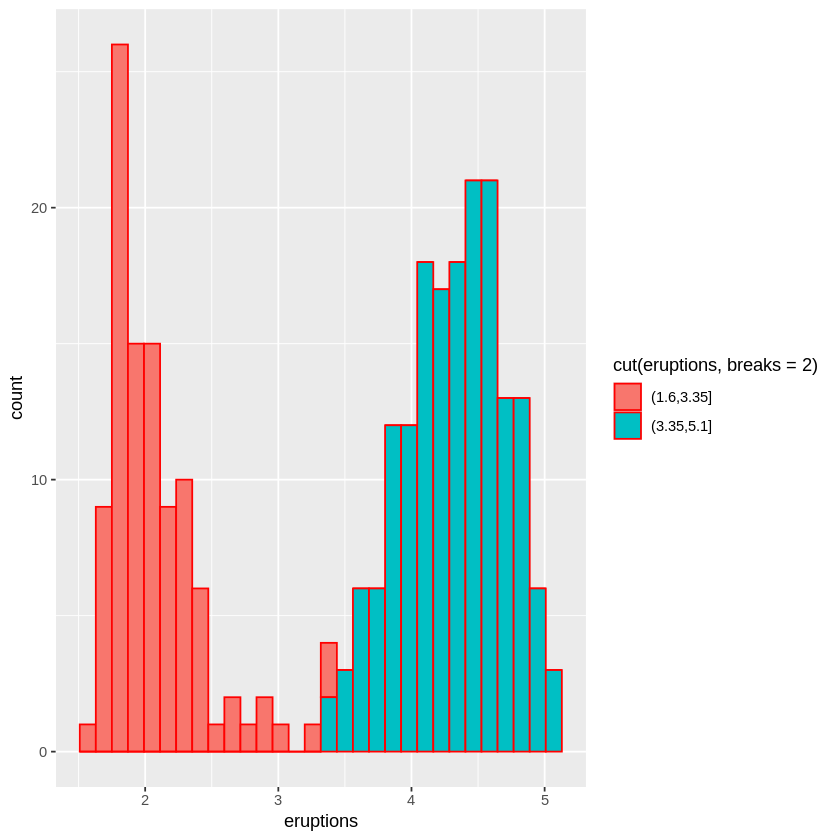

In [8]:
ggplot(faithful) +
  geom_histogram(aes(x = eruptions, fill = cut(eruptions, breaks = 2)), bins = 30, color = "red")

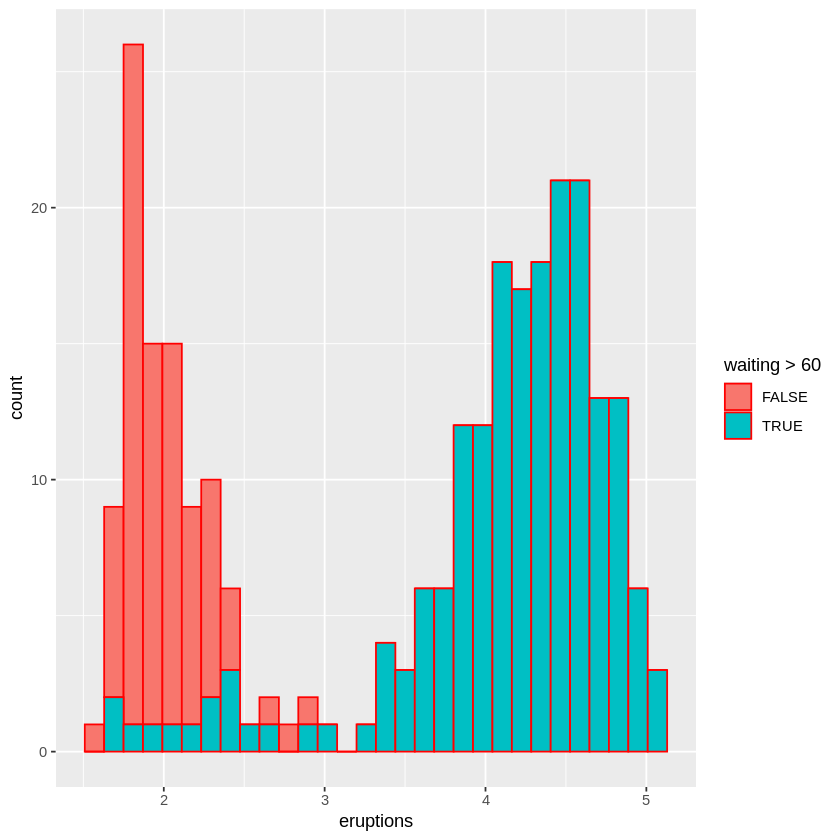

In [9]:
ggplot(faithful) +
  geom_histogram(aes(x = eruptions, fill = waiting > 60), bins = 30, color = "red")

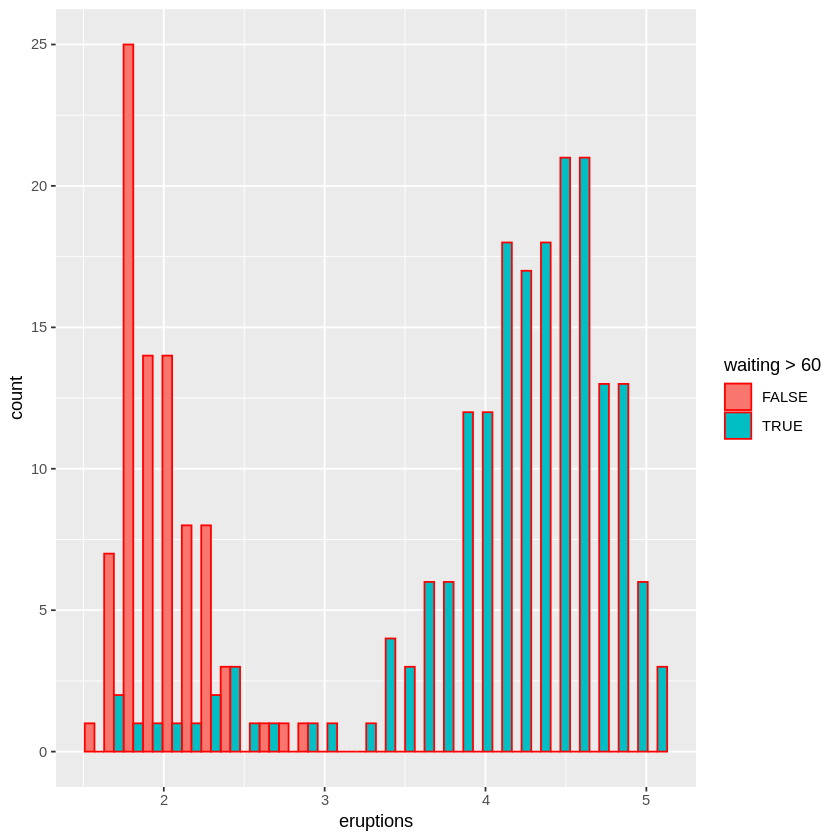

In [10]:
ggplot(faithful) +
  geom_histogram(aes(x = eruptions, fill = waiting > 60), bins = 30, color = "red", position = "dodge")

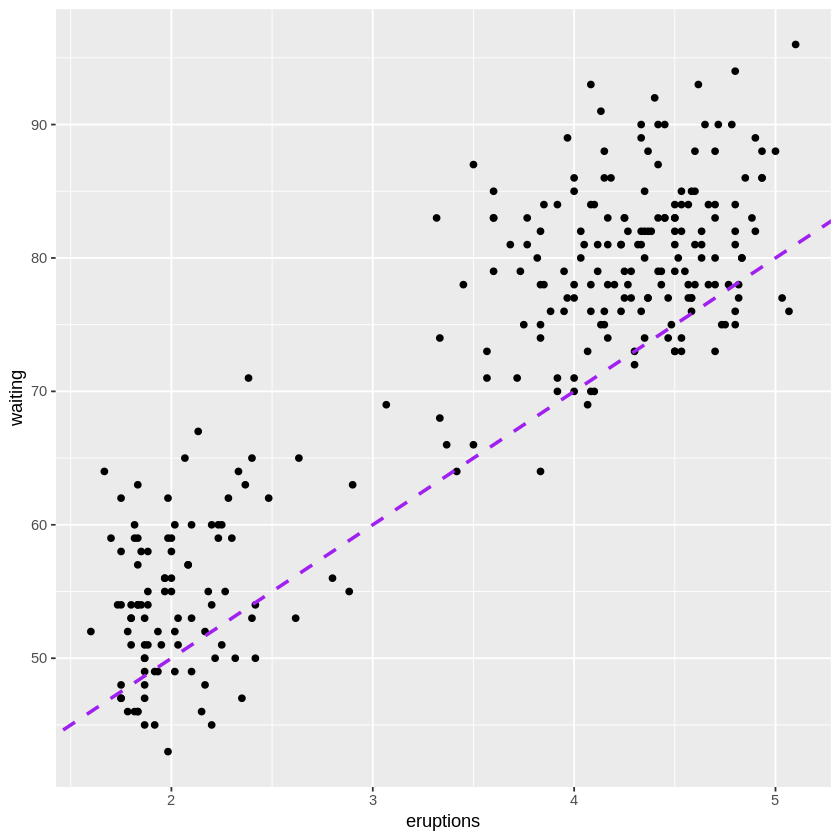

In [11]:
ggplot(faithful) +
  geom_point(aes(x = eruptions, y = waiting)) +
  geom_abline(slope = 10, intercept = 30, color = "purple", linetype = "dashed", linewidth = 1)

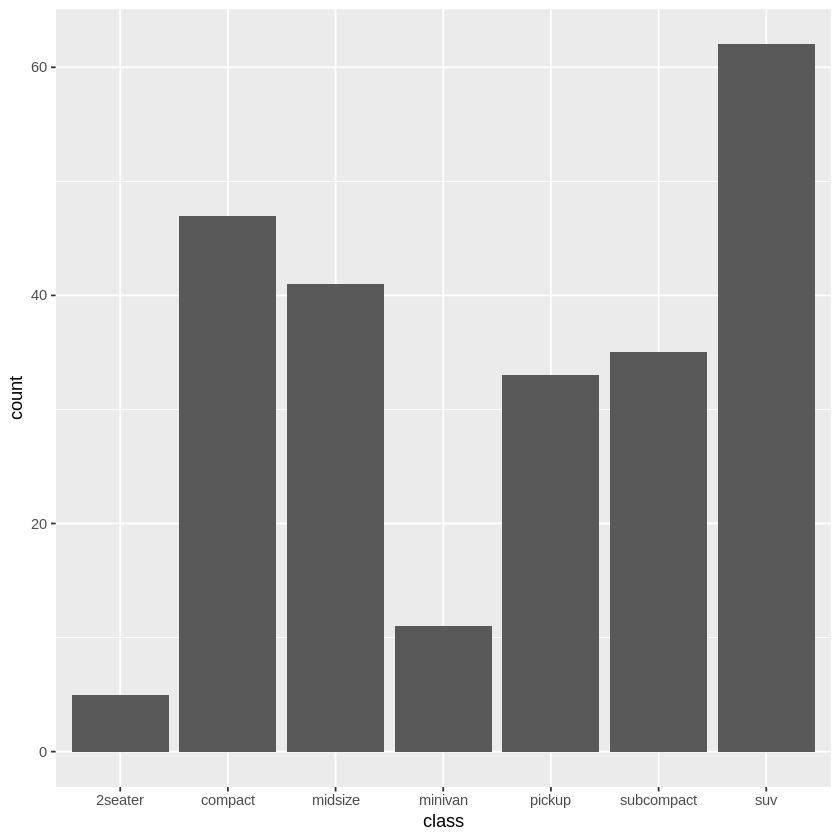

In [12]:
ggplot(mpg) +
  stat_count(aes(x = class), geom = "bar")

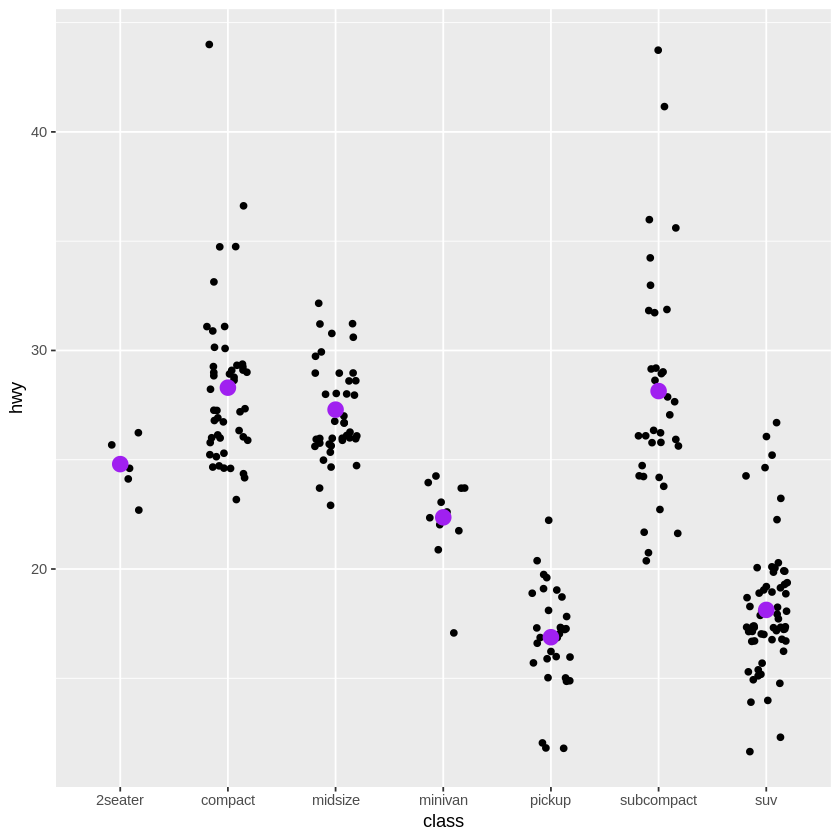

In [18]:
ggplot(mpg) +
  geom_jitter(aes(x = class, y = hwy), width = 0.2) +
  stat_summary(aes(x = class, y = hwy), fun = mean, geom = "point", color = "purple", size = 4)

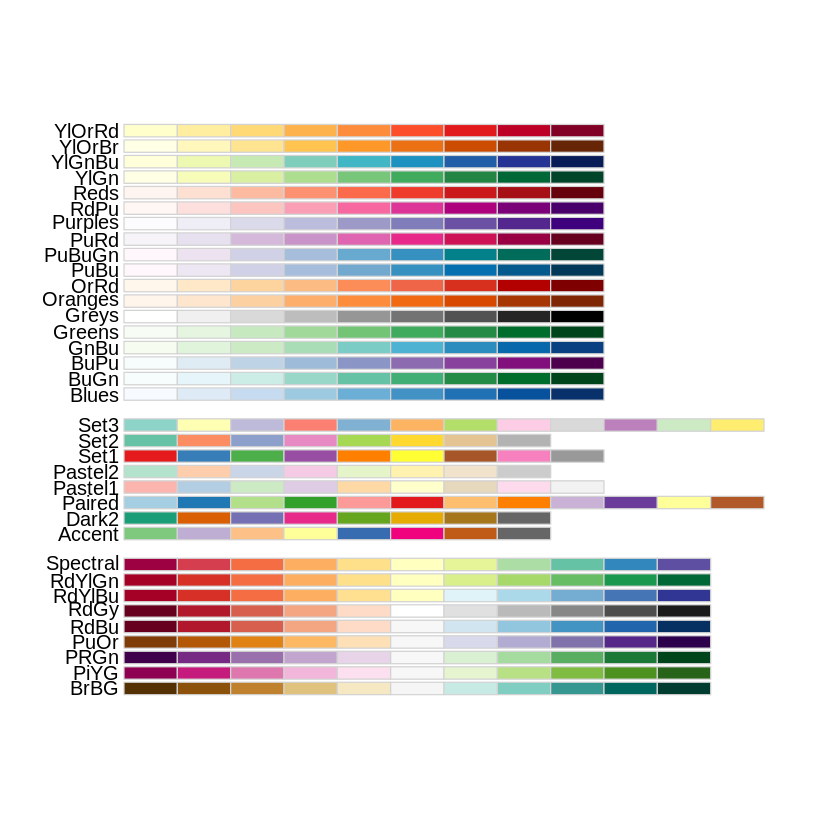

In [19]:
RColorBrewer::display.brewer.all()

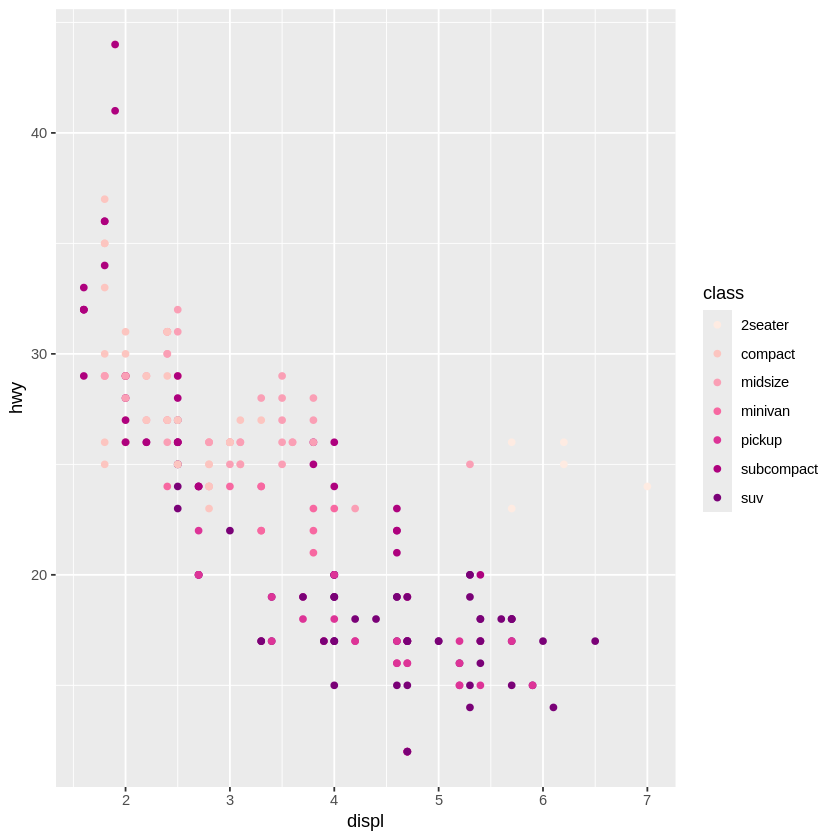

In [20]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy, colour = class)) +
  scale_colour_brewer(palette = "RdPu")

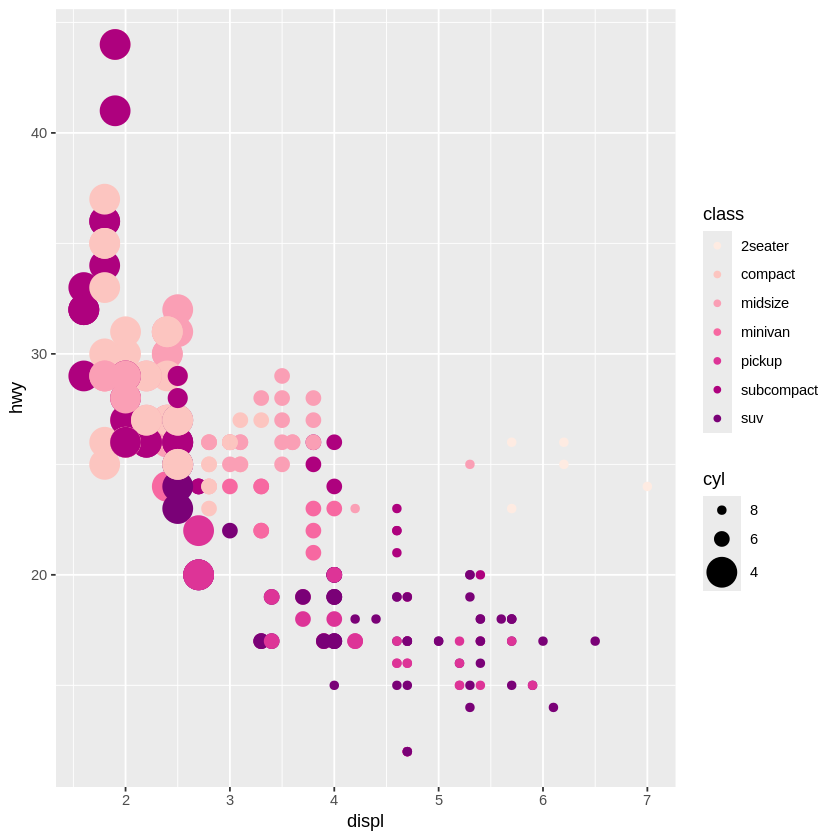

In [22]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy, colour = class, size = cyl)) +
  scale_colour_brewer(palette = "RdPu") +
  scale_size_continuous(breaks = c(8, 6, 4, 2), range = c(8, 2))

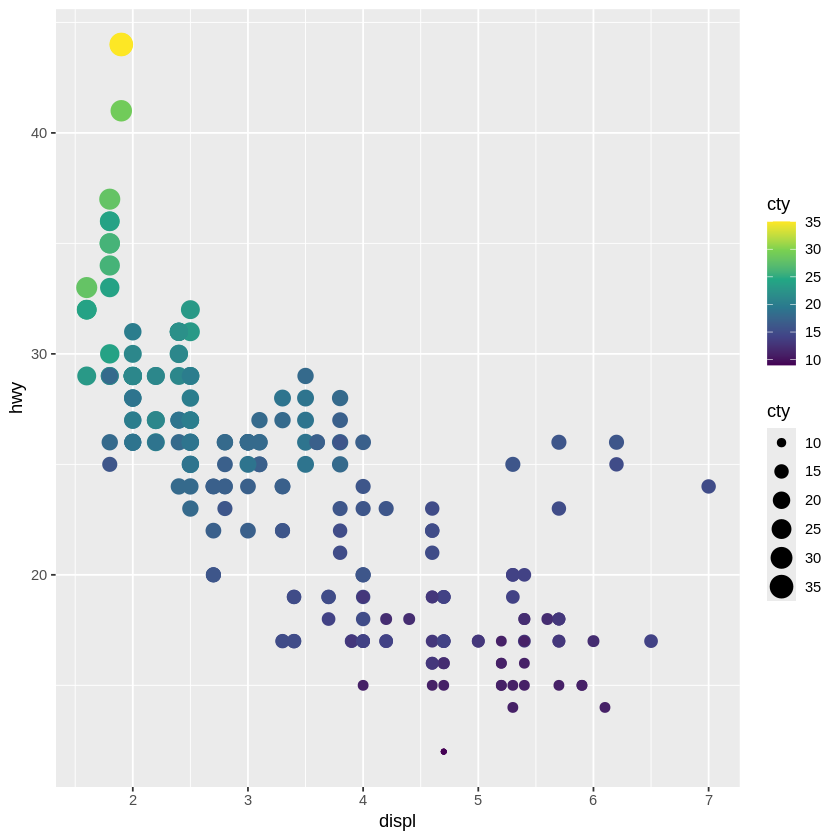

In [24]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy, colour = cty, size = cty)) +
  scale_color_viridis_c()

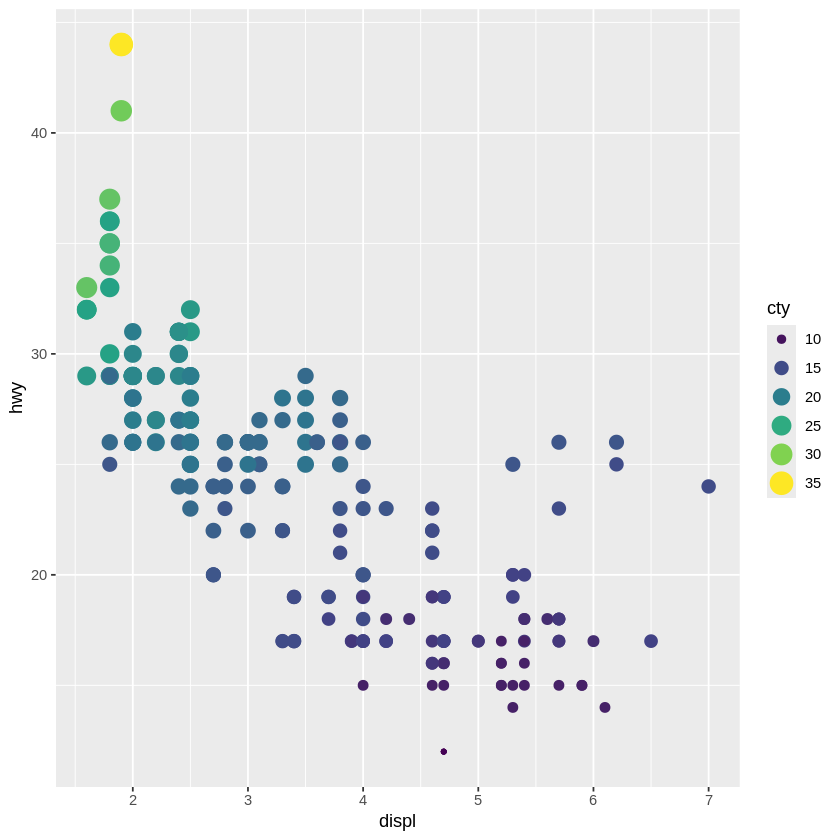

In [25]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy, colour = cty, size = cty)) +
  scale_color_viridis_c(guide = "legend") +
  guides(size = "legend")

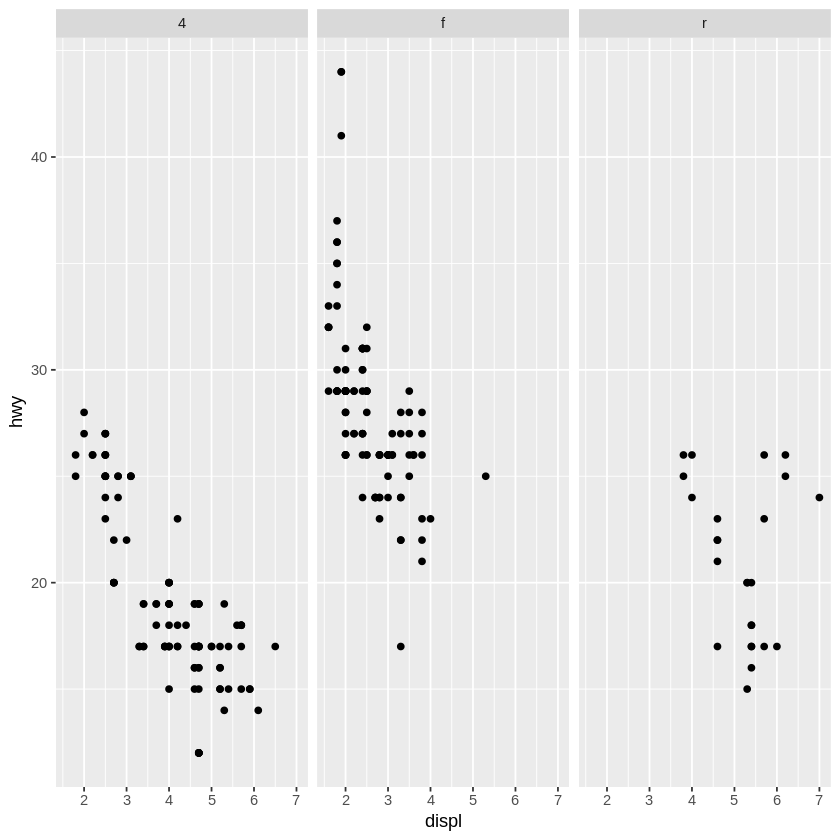

In [26]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ drv, scales = "fixed")

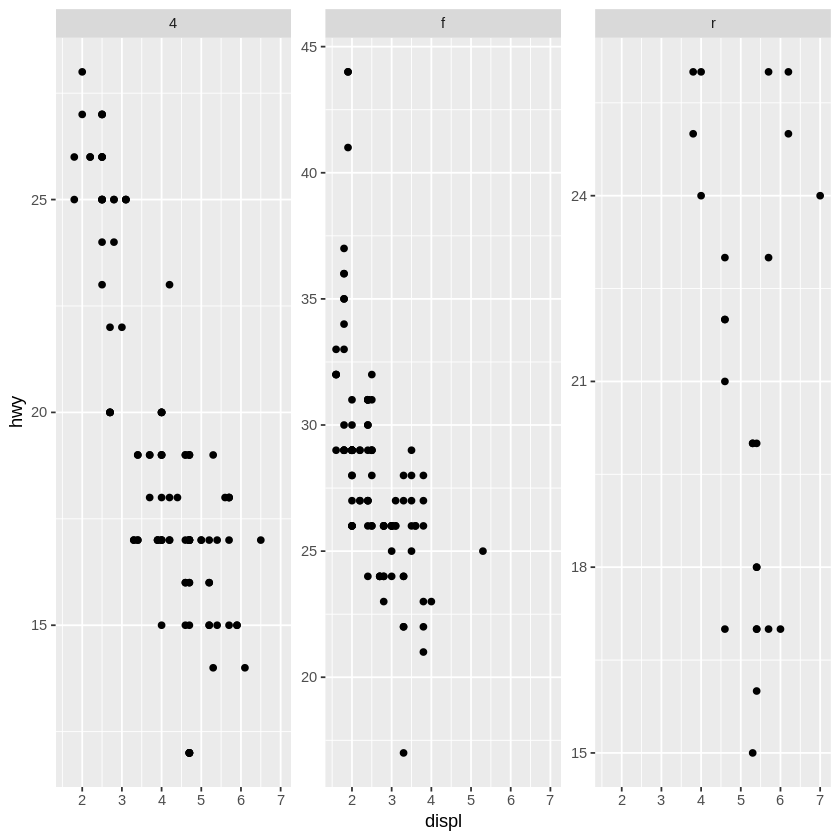

In [27]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ drv, scales = "free_y")

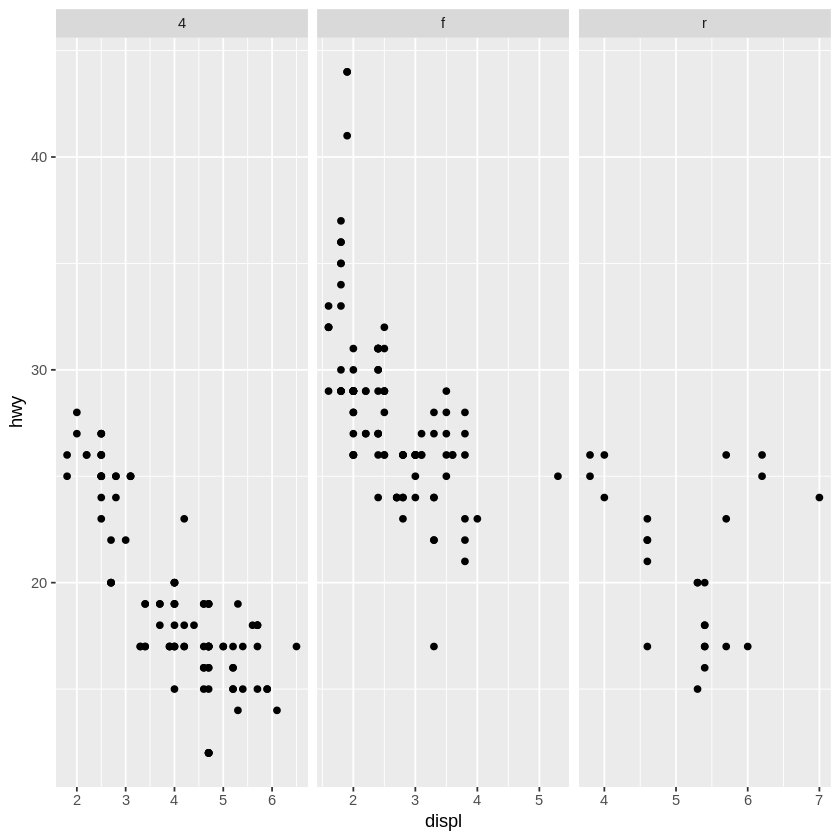

In [28]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ drv, scales = "free_x")

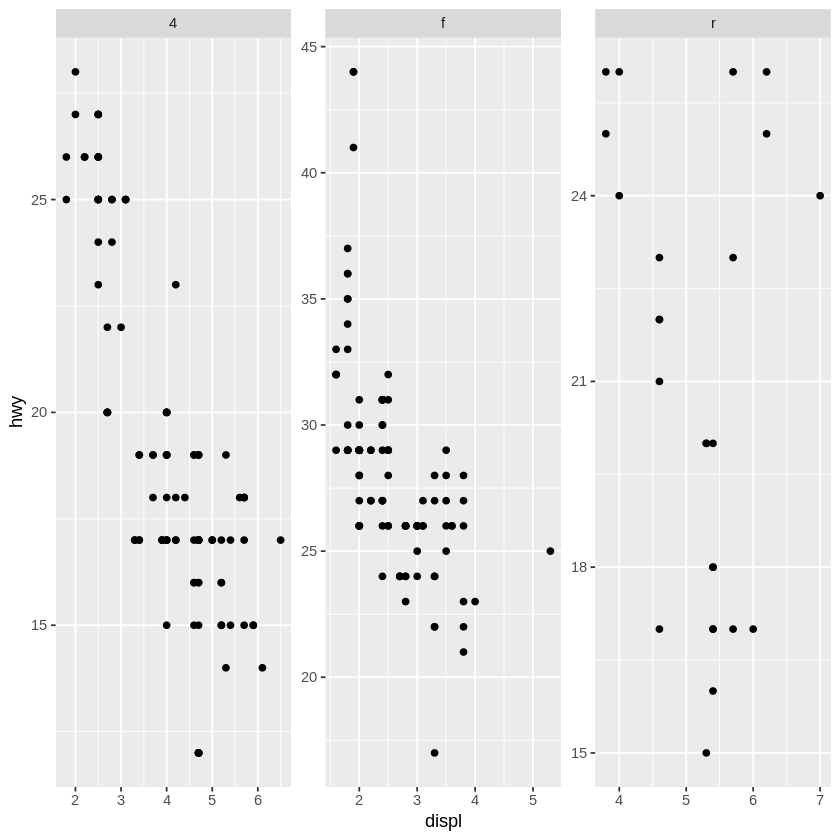

In [29]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ drv, scales = "free")

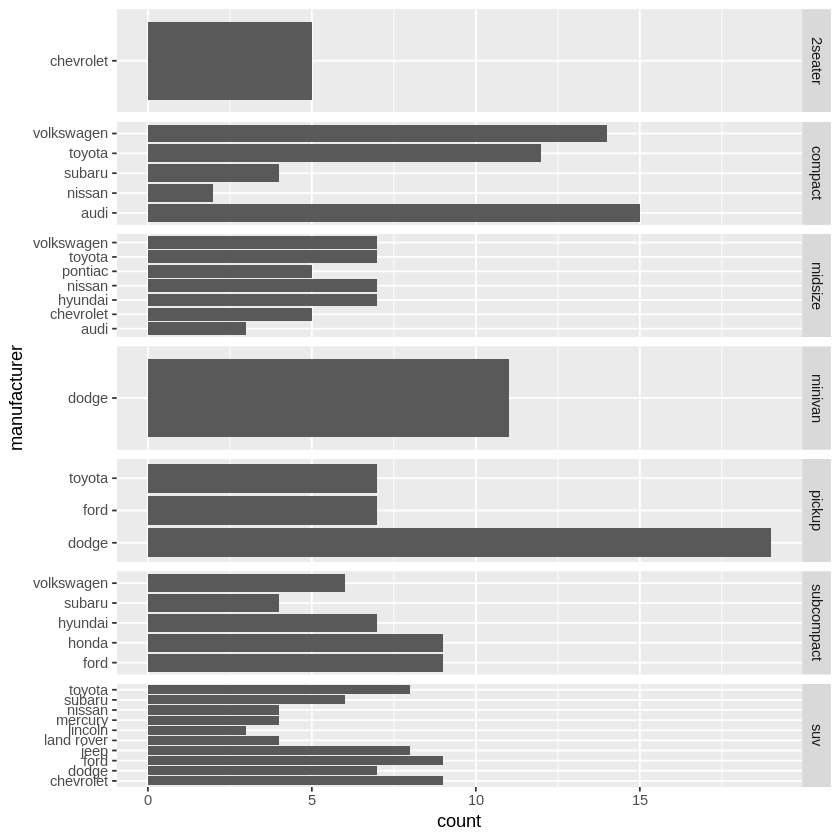

In [30]:
ggplot(mpg) +
  geom_bar(aes(y = manufacturer)) +
  facet_grid(class ~ ., scales = "free_y")

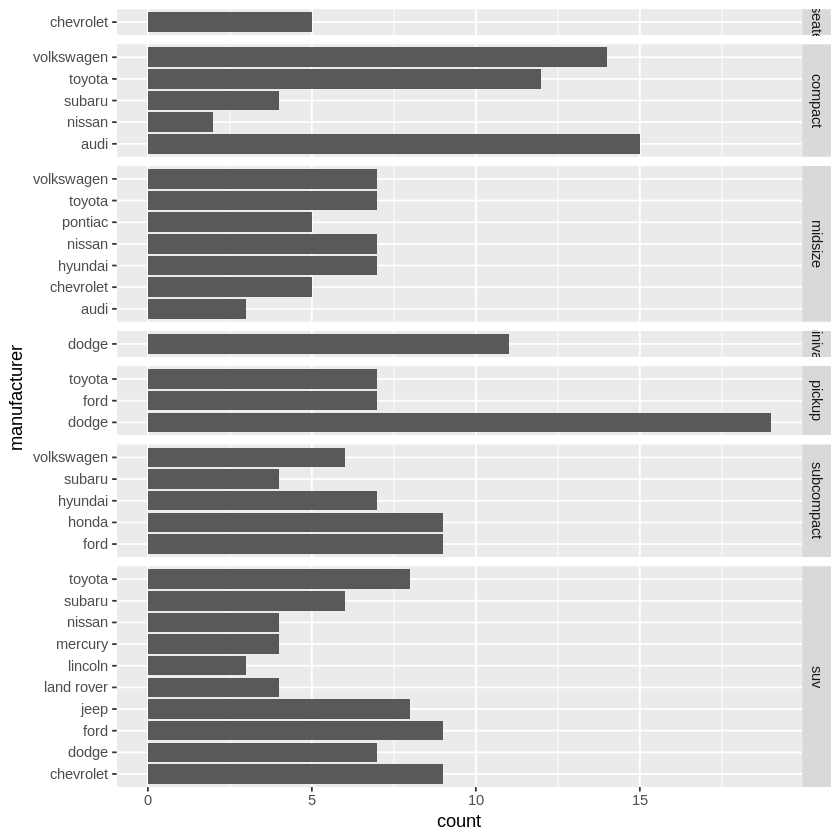

In [31]:
ggplot(mpg) +
  geom_bar(aes(y = manufacturer)) +
  facet_grid(class ~ ., scales = "free_y", space = "free")

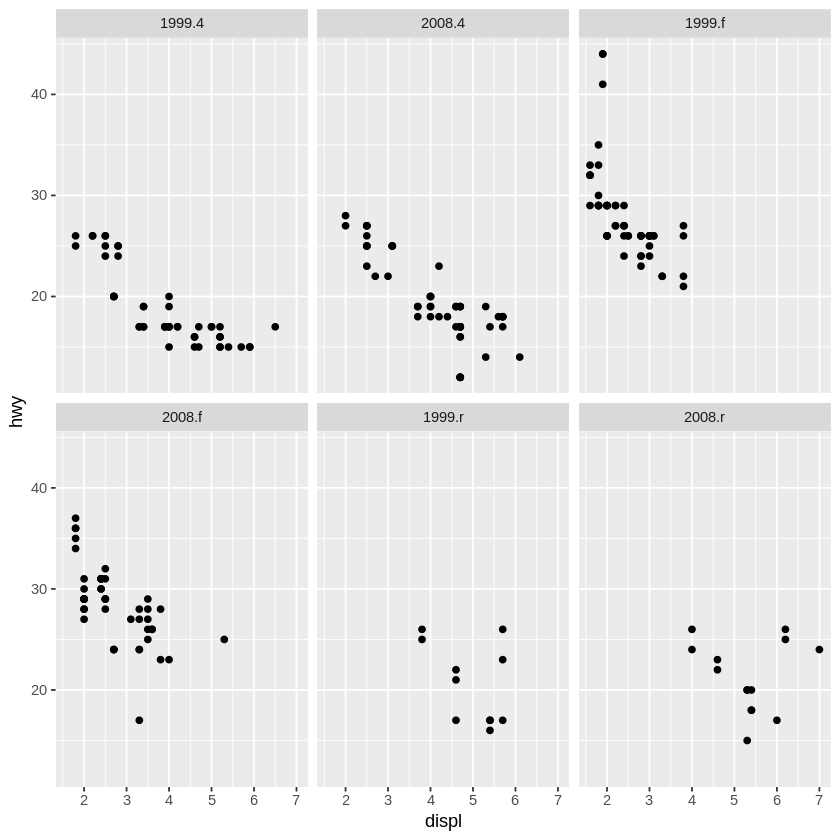

In [32]:
ggplot(mpg) +
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ interaction(year, drv))

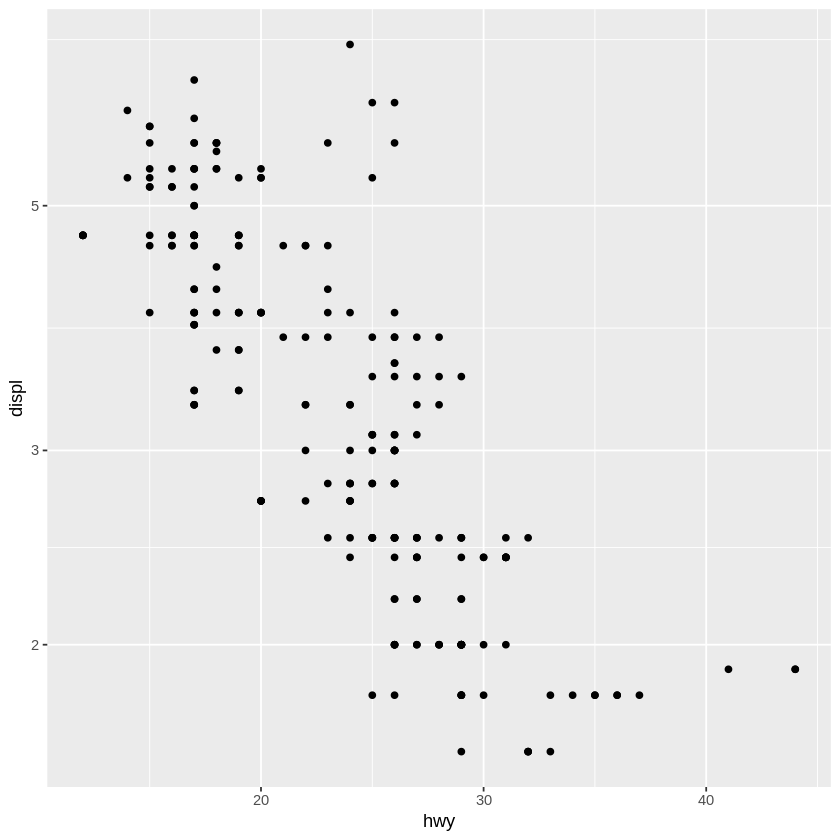

In [34]:
ggplot(mpg) +
  geom_point(aes(x = hwy, y = displ)) +
  scale_y_continuous(trans = "log10")

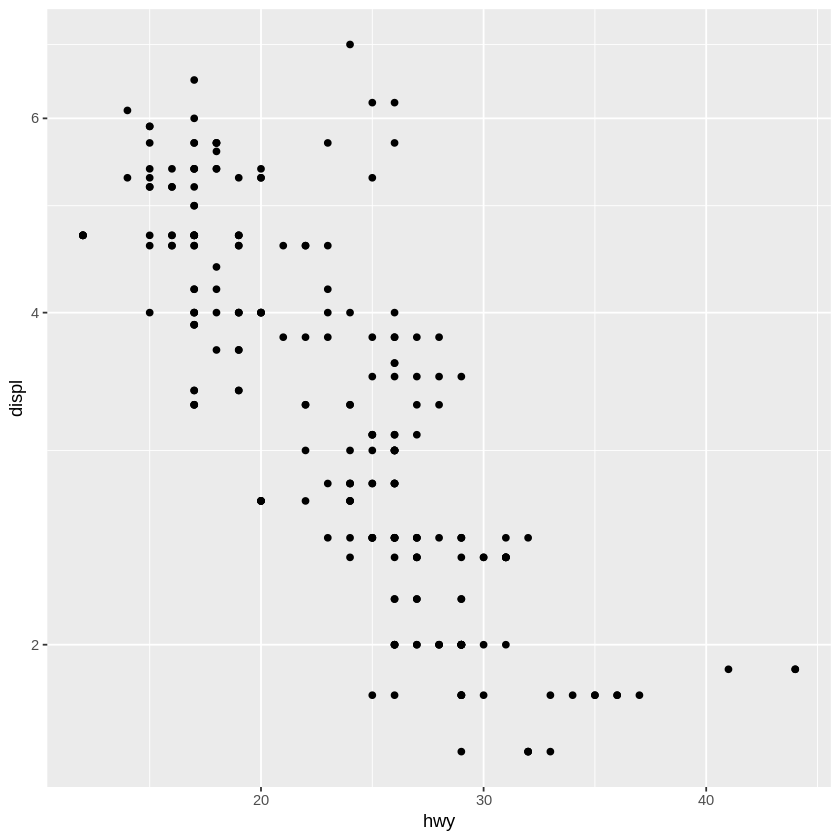

In [35]:
ggplot(mpg) +
  geom_point(aes(x = hwy, y = displ)) +
  coord_trans(y = "log10")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


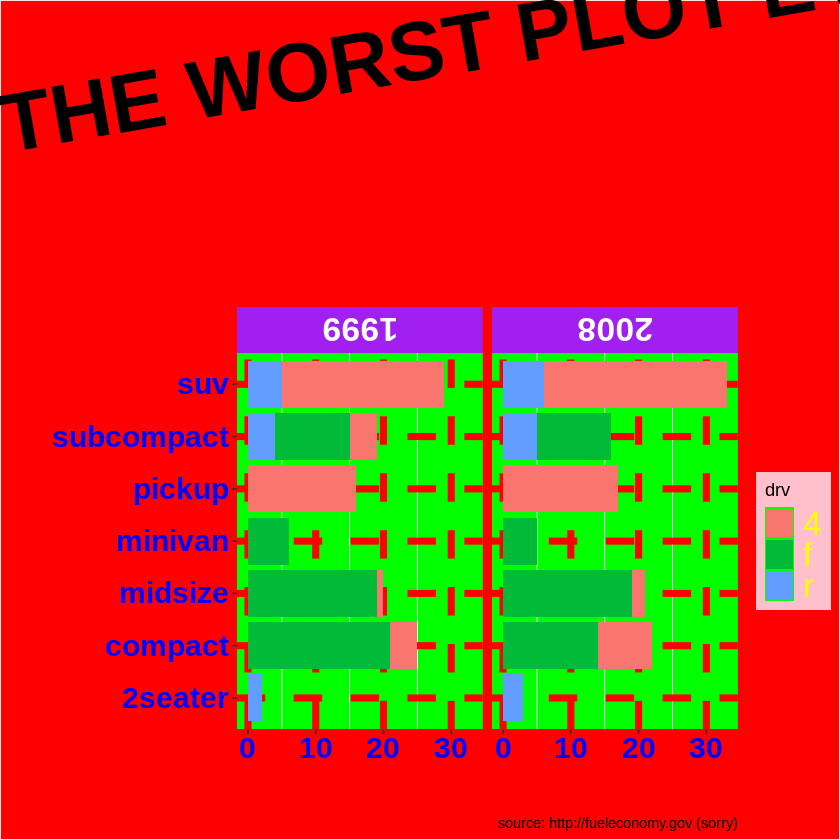

In [36]:
ggplot(mpg) +
  geom_bar(aes(y = class, fill = drv)) +
  facet_wrap(~year) +
  labs(
    title = "💀 THE WORST PLOT EVER 💀",
    caption = "source: http://fueleconomy.gov (sorry)",
    x = "???",
    y = "WHY?"
  ) +
  theme(
    plot.background = element_rect(fill = "red"),
    panel.background = element_rect(fill = "green"),
    panel.grid.major = element_line(color = "red", linetype = "dashed", size = 2),
    axis.text = element_text(size = 18, face = "bold", color = "blue"),
    axis.title = element_text(size = 25, face = "bold", color = "red"),
    strip.background = element_rect(fill = "purple"),
    strip.text = element_text(size = 20, color = "white", face = "bold", angle = 180),
    legend.background = element_rect(fill = "pink"),
    legend.text = element_text(size = 20, color = "yellow"),
    plot.title = element_text(size = 50, face = "bold", color = "black", hjust = 0.5, angle = 10)
  )

In [37]:
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(patchwork)

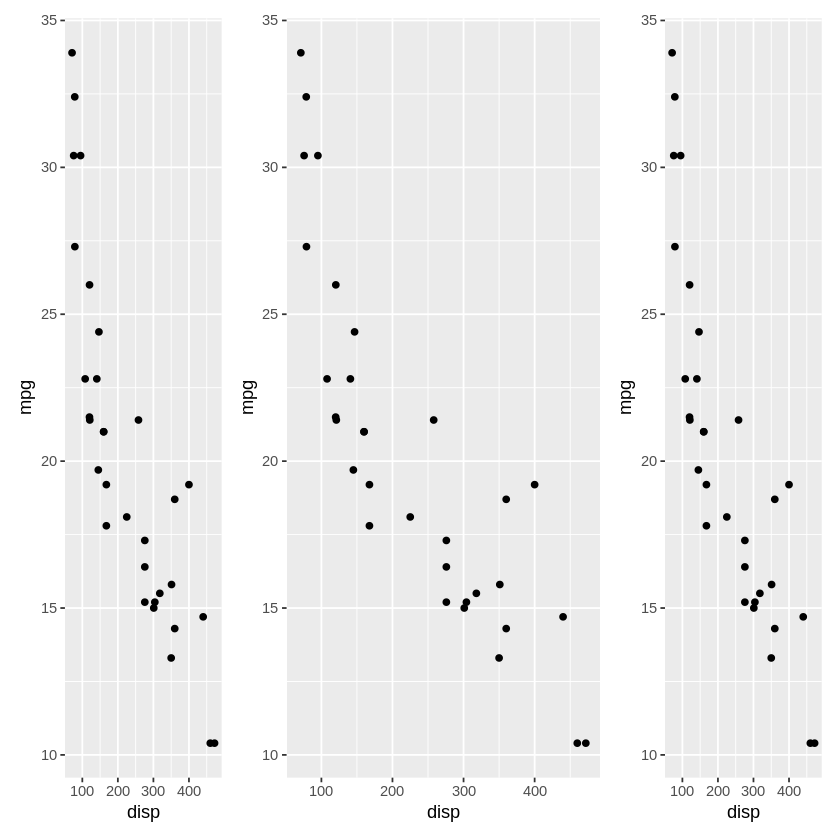

In [39]:
p <- ggplot(mtcars) +
  geom_point(aes(x = disp, y = mpg))

p + p + p + plot_layout(widths = c(2, 4, 2))

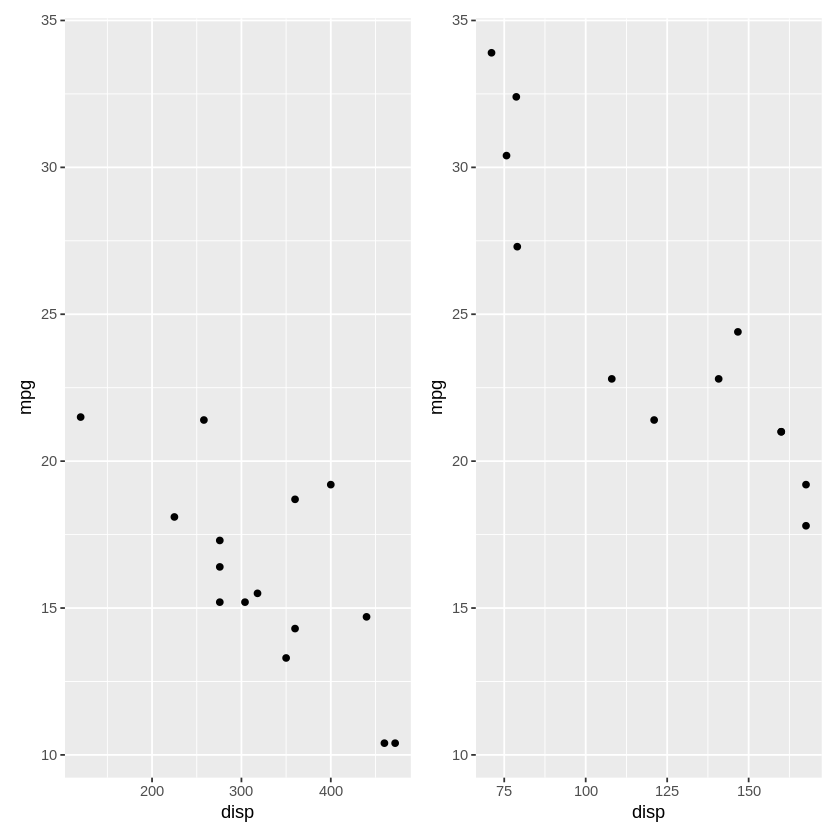

In [40]:
p1 <- ggplot(mtcars[mtcars$gear == 3,]) +
  geom_point(aes(x = disp, y = mpg))

p2 <- ggplot(mtcars[mtcars$gear == 4,]) +
  geom_point(aes(x = disp, y = mpg))

(p1 + p2) & lims(y = range(mtcars$mpg))

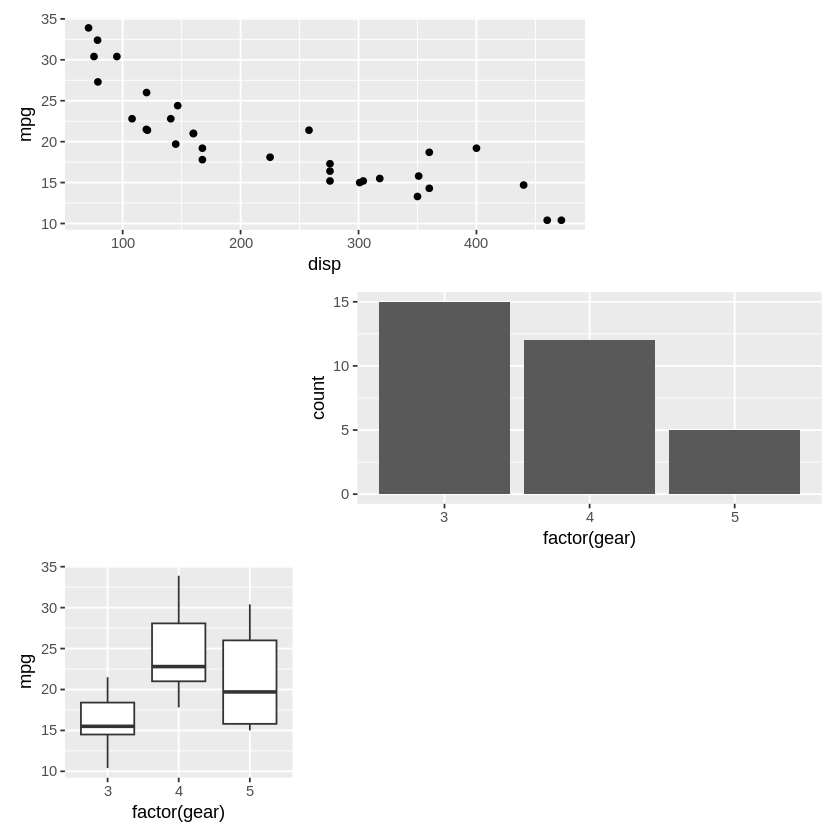

In [41]:
p1 <- ggplot(mtcars) +
  geom_point(aes(x = disp, y = mpg))

p2 <- ggplot(mtcars) +
  geom_bar(aes(x = factor(gear)))

p3 <- ggplot(mtcars) +
  geom_boxplot(aes(x = factor(gear), y = mpg))

layout <- '
AA#
#BB
C##
'

p1 + p2 + p3 + plot_layout(design = layout)

In [42]:
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
library(ggrepel)

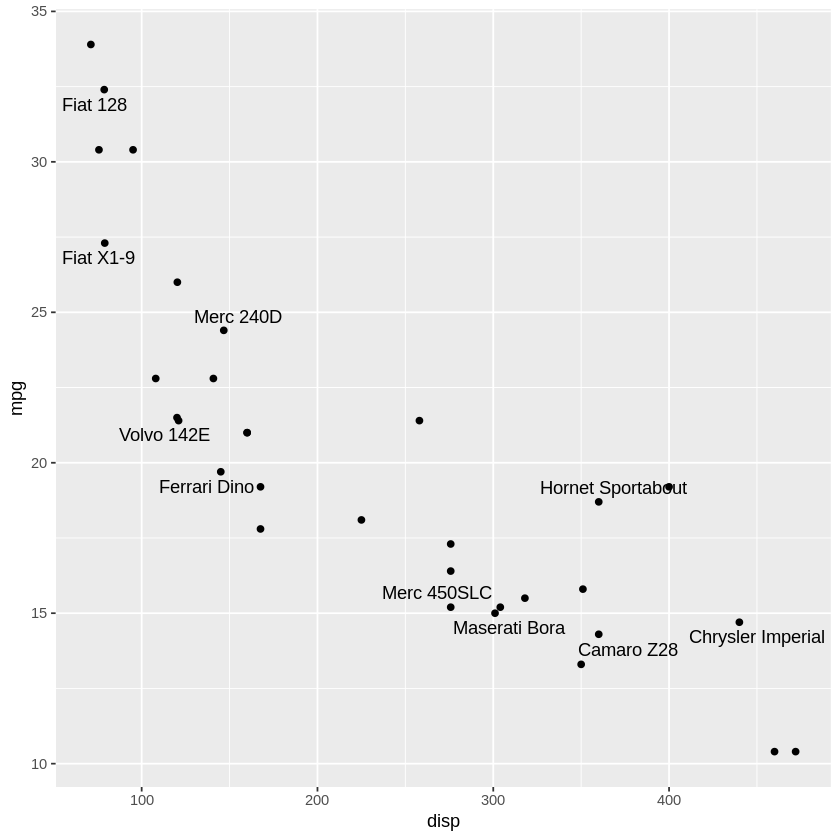

In [44]:
mtcars2 <- mtcars
mtcars2$label <- rownames(mtcars2)
points_to_label <- sample(nrow(mtcars2), 10)

ggplot(mtcars2, aes(x = disp, y = mpg)) +
  geom_point() +
  geom_text_repel(data = mtcars2[points_to_label, ], aes(label = label))

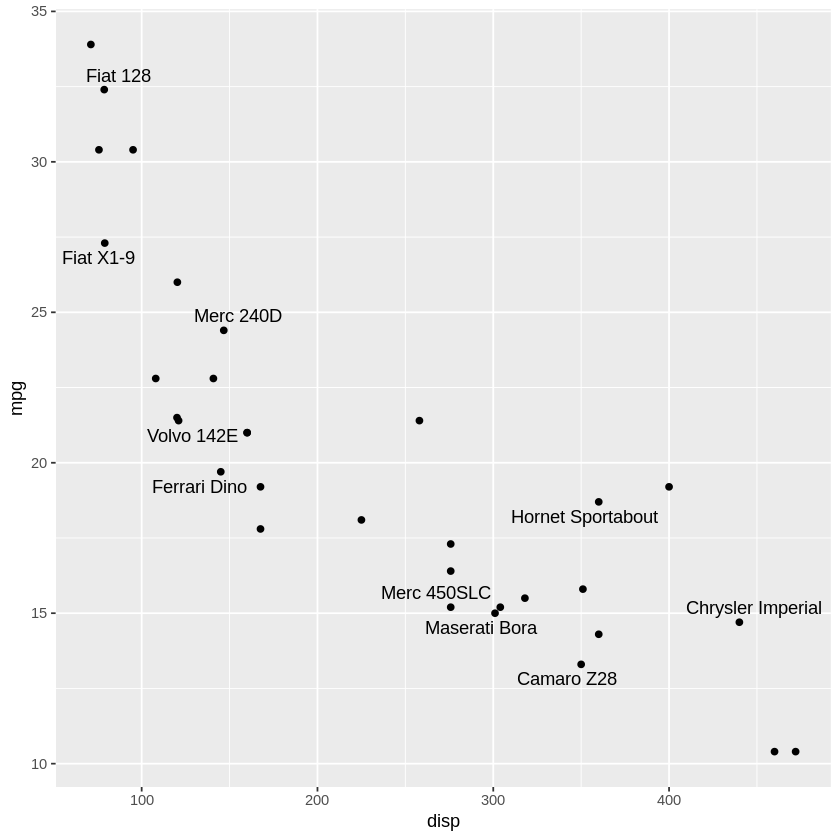

In [45]:
mtcars2$label[-points_to_label] <- ""

ggplot(mtcars2, aes(x = disp, y = mpg)) +
  geom_point() +
  geom_text_repel(aes(label = label))

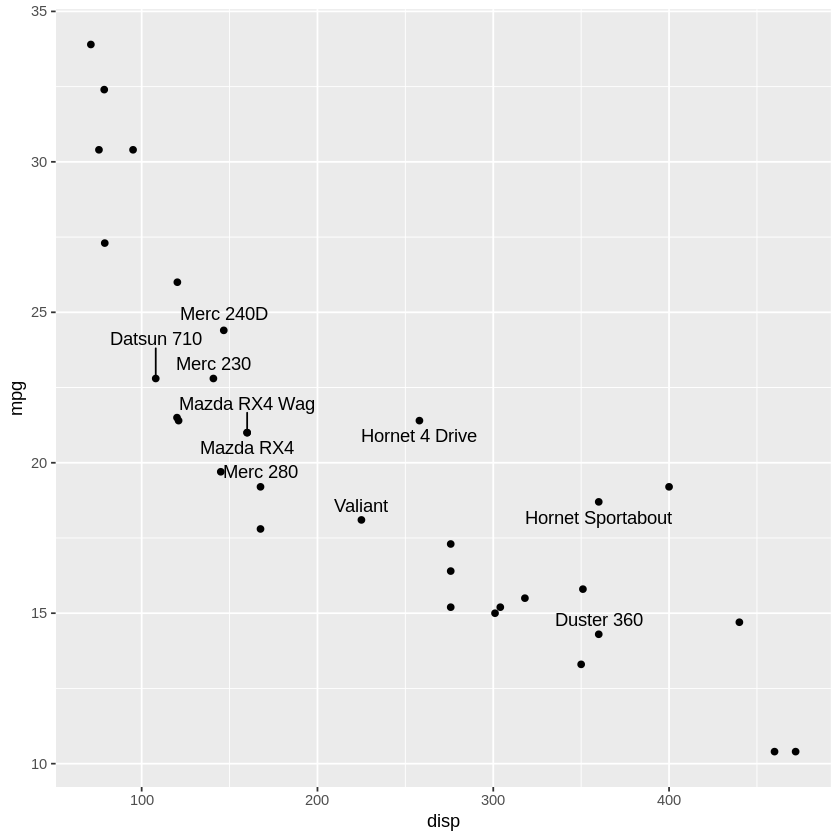

In [46]:
mtcars2$label <- ""
mtcars2$label[1:10] <- rownames(mtcars2)[1:10]

ggplot(mtcars2, aes(x = disp, y = mpg)) +
  geom_point() +
  geom_text_repel(aes(label = label), direction = "y")